# The Task
![image](image.jpeg) </br>
![task](task.jpeg)

# Utilities
Initialization of libraries, functions, and variables that would come in handy

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from copy import deepcopy
from math import ceil, floor

IMAGE = np.array([
        [0, 10, 1, 8, 1, 8, 8, 1, 8, 29, 25, 1, 24, 0, 0, 24],
        [8, 0, 8, 1, 28, 0, 10, 1, 10, 0, 25, 11, 25, 0, 24, 15],
        [29, 10, 29, 28, 28, 29, 28, 1, 8, 22, 29, 25, 1, 24, 0, 15],
        [3, 10, 3, 1, 5, 0, 3, 6, 1, 6, 1, 25, 29, 6, 14, 26],
        [28, 0, 28, 29, 1, 1, 10, 15, 29, 22, 22, 1, 25, 0, 14, 26],
        [28, 1, 29, 10, 10, 1, 10, 1, 21, 0, 14, 14, 29, 26, 9, 15],
        [29, 28, 28, 0, 12, 29, 3, 21, 29, 14, 1, 29, 26, 26, 29, 26],
        [29, 30, 3, 1, 5, 0, 1, 6, 8, 6, 22, 11, 1, 6, 26, 26],
        [3, 0, 29, 12, 12, 21, 12, 11, 1, 11, 0, 22, 29, 24, 0, 18],
        [29, 1, 29, 29, 12, 29, 3, 9, 29, 20, 20, 1, 23, 29, 27, 20],
        [29, 30, 3, 0, 4, 12, 20, 21, 7, 20, 1, 29, 20, 6, 27, 27],
        [3, 30, 30, 12, 1, 21, 0, 13, 11, 6, 13, 7, 23, 19, 27, 18],
        [30, 0, 30, 29, 12, 29, 1, 21, 29, 29, 13, 1, 29, 19, 0, 18],
        [3, 30, 3, 0, 21, 12, 3, 0, 7, 7, 0, 7, 1, 23, 18, 18],
        [29, 1, 29, 21, 1, 29, 31, 1, 29, 13, 13, 7, 17, 24, 0, 27],
        [3, 0, 30, 21, 0, 30, 30, 1, 12, 0, 13, 7, 17, 17, 0, 27]
], dtype=int)

def showImage(image):
    fig, ax = plt.subplots(ncols = 1, figsize=(5,5))
    sns.heatmap(image, ax=ax, vmin=0,
        vmax=31, annot=True, fmt="", cmap="grey"
    )

[29, 33, 0, 13, 1, 2, 8, 7, 8, 2, 9, 5, 10, 6, 5, 4, 0, 3, 5, 2, 6, 9, 5, 3, 6, 6, 8, 6, 9, 35, 10, 1]


# Number 1
Number of bins could be thought as how many groups you want the data to belonged to. Given the upper bound of the data, number of bins would determine how large is the interval for a particular bin. This is defined by
```
numberOfBin = maxValue / binSize
```

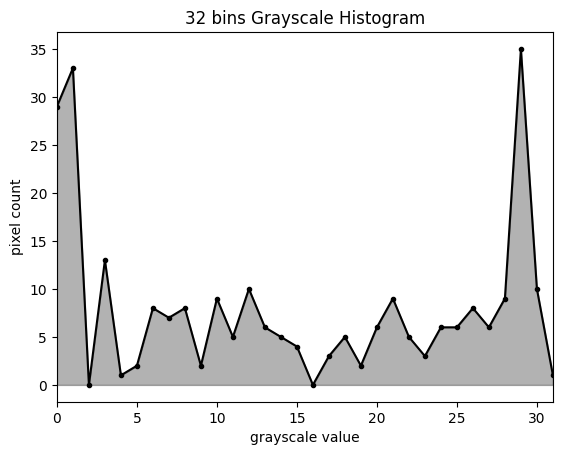

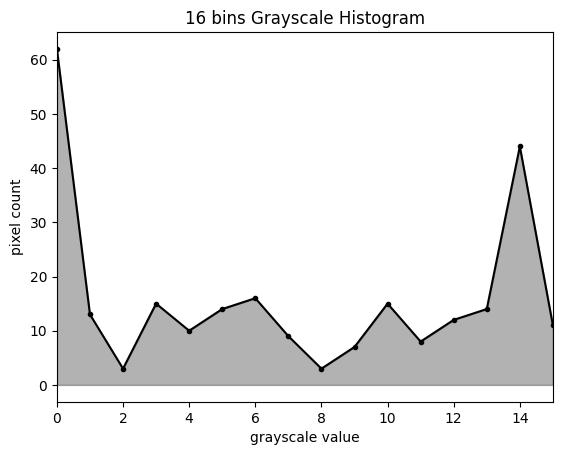

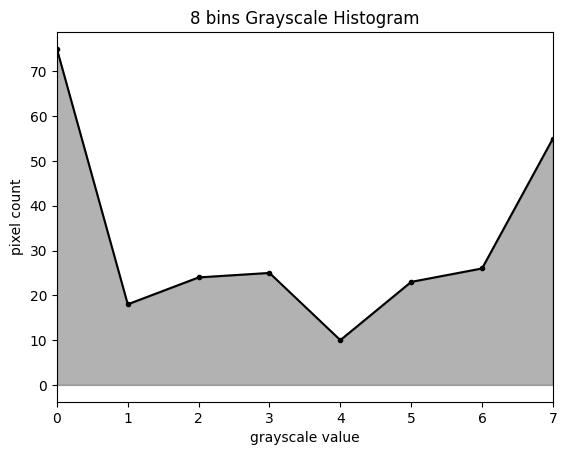

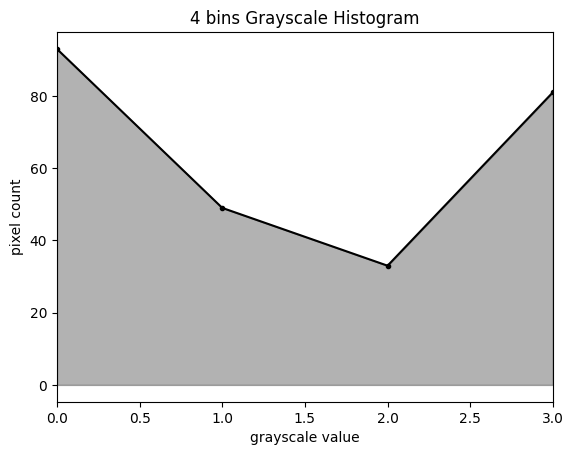

In [8]:
def renderHistogram(hist, binSize, title):
    # Credits: https://datacarpentry.org/image-processing/05-creating-histograms.html
    # Accessed on 15/03/24
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel("grayscale value")
    ax.set_ylabel("pixel count")
    ax.set_xlim([0, 31 // binSize])

    ax.fill_between(hist[1][0:-1], hist[0], color="black", alpha=0.3)
    ax.plot(hist[1][0:-1], hist[0], marker=".", color="black")

def makeHistogram(image, binSize):
    if binSize != 1: # "Normaliize" based on bin size
        image = deepcopy(image)
        for ydx in range(image.shape[0]):
            for xdx in range(image.shape[1]):
                image[ydx][xdx] = image[ydx][xdx] // binSize

    histogram, bin_edges = np.histogram(image, bins=(32 // binSize), range=(0, 32 // binSize))
    return (histogram, bin_edges)

# Number of bin = maxValue / binSize
renderHistogram(makeHistogram(IMAGE, 1), 1, "32 bins Grayscale Histogram") # 32 bins
renderHistogram(makeHistogram(IMAGE, 2), 2, "16 bins Grayscale Histogram") # 16 bins
renderHistogram(makeHistogram(IMAGE, 4), 4, "8 bins Grayscale Histogram") # 8 bins
renderHistogram(makeHistogram(IMAGE, 8), 8, "4 bins Grayscale Histogram") # 4 bins

# Number 2
Histogram equalization is often used to fix a washed-out image (image with low contrast) as it would distribute the frequency of the grayscale value in the image evenly. This could be done with the following steps:
> Credits: https://www.tutorialspoint.com/dip/Histogram_Equalization.htm <br/>
> About PMF and CDF: https://www.tutorialspoint.com/dip/introduction_to_probability.htm <br/>
> Accessed on 15/03/2024
1. Lorem
2. Ipsum
3. Sit
4. Dolor
5. Amet

[0, 0, 75, 42, 35, 49, 0, 55]


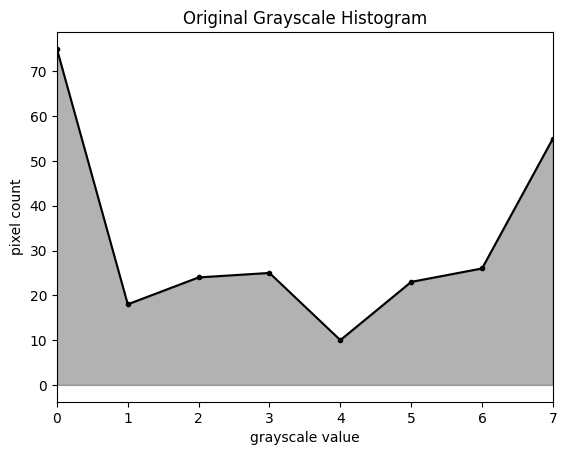

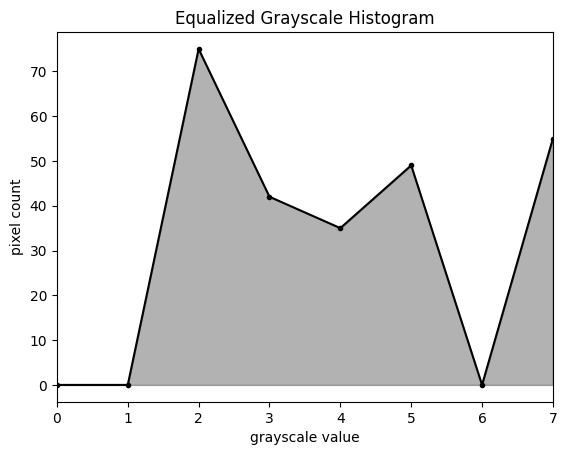

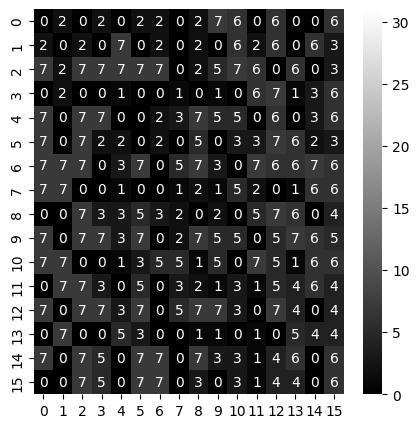

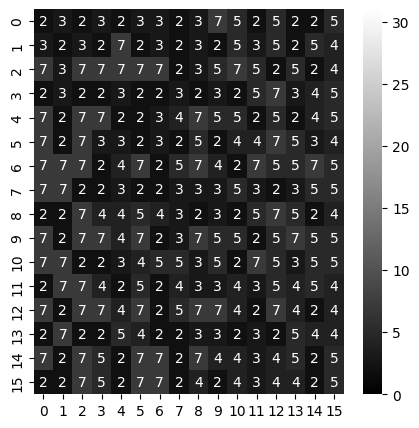

In [14]:
def solveNum2():
    # Make image with number bins of 8
    image = deepcopy(IMAGE)
    frequency = [0 for pixValue in range(8)]
    for ydx in range(image.shape[0]):
        for xdx in range(image.shape[1]):
            image[ydx][xdx] = image[ydx][xdx] // 4
            frequency[image[ydx][xdx]] += 1
    
    # Calculate CDF
    imageSize = IMAGE.shape[0]*IMAGE.shape[1]
    PMF = [freq/(imageSize) for freq in frequency] # list of probabilities of certain value of pixel found in image, Pr(Rk)
    CDF = [sum(PMF[:upBound + 1]) for upBound in range(len(PMF))] # list of cummulative probabilites, Sk

    # Multiply each CDF by highest available pixel value
    transformedPixelValue = [round(CDF[idx]*7) for idx in range(len(CDF))]

    freq = [0 for _ in range(8)]
    # Apply transformed pixel value
    newImage = np.empty(IMAGE.shape, dtype=int)
    for ydx in range(IMAGE.shape[0]):
        for xdx in range(IMAGE.shape[1]):
            newImage[ydx][xdx] = transformedPixelValue[image[ydx][xdx]]
            freq[newImage[ydx][xdx]] += 1
    print(freq)

    renderHistogram(np.histogram(image, bins=(8), range=(0, 8)), 4, "Original Grayscale Histogram")
    renderHistogram(np.histogram(newImage, bins=(8), range=(0, 8)), 4, "Equalized Grayscale Histogram")
    showImage(image); showImage(newImage)

solveNum2()

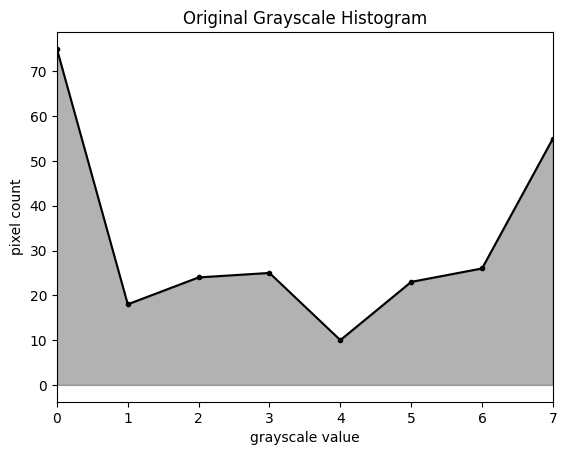

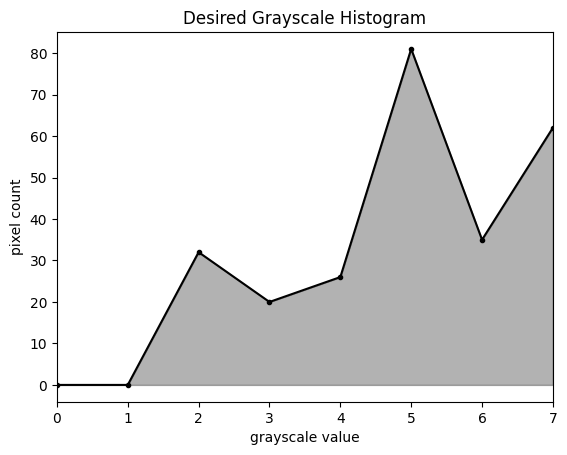

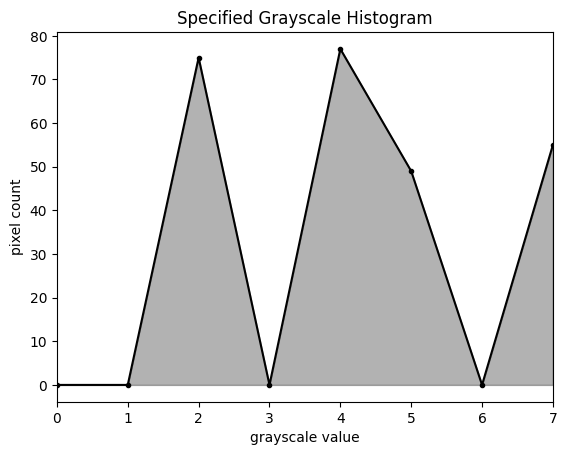

In [25]:
def solveNum3():
    # Make image with number bins of 8
    image = deepcopy(IMAGE)
    imageFreq = [0 for _ in range(8)]
    for ydx in range(image.shape[0]):
        for xdx in range(image.shape[1]):
            image[ydx][xdx] = image[ydx][xdx] // 4
            imageFreq[image[ydx][xdx]] += 1

    desiredImage = np.array([
        [20, 20, 21, 18, 21, 28, 28, 21, 18, 29, 25, 21, 24, 10, 10, 24],
        [28, 20, 18, 21, 28, 10, 20, 21, 20, 20, 25, 21, 25, 10, 24, 25],
        [29, 20, 29, 28, 28, 29, 28, 21, 18, 22, 29, 25, 21, 24, 10, 15],
        [13, 10, 13, 21, 15, 10, 13, 16, 21, 16, 21, 25, 29, 16, 14, 26],
        [28, 10, 28, 29, 21, 21, 10, 15, 29, 22, 22, 21, 25, 10, 24, 26],
        [28, 21, 29, 20, 20, 21, 20, 11, 21, 10, 24, 24, 29, 26, 19, 25],
        [29, 28, 28, 10, 22, 29, 13, 21, 29, 24, 21, 29, 26, 26, 29, 26],
        [29, 30, 13, 21, 15, 10, 11, 16, 18, 16, 22, 21, 21, 16, 26, 26],
        [13, 10, 29, 22, 22, 21, 22, 21, 11, 21, 10, 22, 29, 24, 10, 28],
        [29, 21, 29, 29, 22, 29, 13, 19, 29, 20, 20, 11, 23, 29, 27, 20],
        [29, 30, 13, 20, 14, 22, 20, 21, 17, 20, 11, 29, 20, 16, 27, 27],
        [13, 30, 30, 22, 21, 21, 10, 23, 21, 16, 23, 17, 23, 19, 27, 18],
        [30, 10, 30, 29, 22, 29, 21, 21, 29, 29, 23, 21, 29, 19, 10, 28],
        [13, 30, 13, 20, 21, 22, 13, 10, 17, 17, 10, 17, 21, 30, 28, 18],
        [29, 11, 29, 21, 21, 29, 31, 21, 29, 23, 13, 17, 27, 24, 10, 27],
        [13, 10, 30, 21, 10, 30, 30, 21, 22, 10, 23, 17, 27, 27, 10, 27]
    ], dtype=int)
    
    desiredImageFreq = [0 for _ in range(8)]
    for ydx in range(desiredImage.shape[0]):
        for xdx in range(desiredImage.shape[1]):
            desiredImage[ydx][xdx] = desiredImage[ydx][xdx] // 4
            desiredImageFreq[desiredImage[ydx][xdx]] += 1
    
    # Get Pk(Rk) *see previous number for notation meaning
    imageSize = IMAGE.shape[0]*IMAGE.shape[1]
    imagePMF = [freq/(imageSize) for freq in imageFreq]
    desiredImagePMF = [freq/(imageSize) for freq in desiredImageFreq]
    
    # Get Sk *see previous number for notation meaning
    transformedImagePixels = [
        round(7*sum(imagePMF[:upBound + 1])) for upBound in range(len(imagePMF))
    ]
    transformedDesiredImagePixels = [
        round(7*sum(desiredImagePMF[:upBound + 1])) for upBound in range(len(desiredImagePMF))
    ]

    def getNearest(val):
        idxMin = 0
        for ptr in range(len(transformedDesiredImagePixels)):
            if (abs(val - transformedDesiredImagePixels[idxMin]) >= 
                abs(val - transformedDesiredImagePixels[ptr])
            ): 
                idxMin = ptr
                
        return transformedDesiredImagePixels[idxMin]

    #print(transformedImagePixels)
    transformedImagePixels = list(map(lambda x: getNearest(x), transformedImagePixels))
    #print(transformedDesiredImagePixels)
    #print(transformedImagePixels)

    renderHistogram(np.histogram(image, bins=(8), range=(0, 8)), 4, "Original Grayscale Histogram")
    imageFreq = [0 for _ in range(8)]
    for ydx in range(IMAGE.shape[0]):
        for xdx in range(IMAGE.shape[1]):
            image[ydx][xdx] = transformedImagePixels[image[ydx][xdx]]
            imageFreq[image[ydx][xdx]] += 1
            
    # Inspect initial histograms
    renderHistogram(np.histogram(desiredImage, bins=(8), range=(0, 8)), 4, "Desired Grayscale Histogram")
    renderHistogram(np.histogram(image, bins=(8), range=(0, 8)), 4, "Specified Grayscale Histogram")

solveNum3()